Метод k-ближайших соседей (k-Nearest Neighbors, KNN) — это один из самых
простых и интуитивно понятных алгоритмов машинного обучения. Он используется как для
классификации, так и для регрессии. Алгоритм работает по принципу: чтобы определить, к
какому классу принадлежит новый объект, нужно посмотреть на его ближайших "соседей"
в пространстве признаков. Чем большее количество соседей мы учитываем, тем более
устойчивым будет результат.

Как работает KNN?

Когда необходимо классифицировать объект, KNN рассчитывает его расстояние до
других объектов в пространстве признаков, например, используя евклидово расстояние
(по сути, это просто расстояние между точками в многомерном пространстве). Затем
алгоритм выбирает k ближайших соседей и назначает новому объекту класс, основываясь
на том, какой класс преобладает среди этих соседей.

Пример использования KNN:

Представим, что у нас есть данные о разных цветах цветов, где каждому цветку
присваивается определенный вид (например, ирис, роза, ромашка). Каждый цветок описан
несколькими признаками, такими как длина и ширина лепестков, длина и ширина
чашелистиков. Для того чтобы классифицировать новый цветок, алгоритм KNN ищет k
ближайших известных цветков и присваивает новому цветку тот вид, который преобладает
среди этих ближайших соседей.

Пример 1. Применить метод k-ближайших соседей на реальных данных с использованием библиотеки `scikit-learn`. В качестве примера возьмем популярный набор данных о цветах ириса (Iris dataset), который уже встроен в библиотеку.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [2]:
# Загружаем данные о цветах ириса
data = load_iris()
X = data.data # Признаки (длина и ширина лепестков и чашелистиков)
y = data.target # Целевая переменная (виды цветов)

In [3]:
# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Создаем модель KNN с 3 ближайшими соседями
knn = KNeighborsClassifier(n_neighbors=3)

In [5]:
# Обучаем модель
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# Предсказание для тестовой выборки
y_pred = knn.predict(X_test)

In [7]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

Точность модели: 100.00%


In [8]:
# Пример предсказания для нового цветка
new_flower = np.array([[5.2, 2.0, 3.5, 1.0]]) # Признаки нового цветка
predicted_class = knn.predict(new_flower)
print(f"Предсказанный вид для нового цветка: {data.target_names[predicted_class][0]}")

Предсказанный вид для нового цветка: versicolor


Пример 2.
Предположим, у нас есть набор данных о фруктах.
Мы знаем, что:
- Яблоки: красные, круглый, вес 200 г.
- Апельсины: оранжевые, круглые, вес 250 г.
- Бананы: желтые, длинные, вес 150 г.
Теперь, представьте, что нам нужно классифицировать новый фрукт:
- Цвет: красный
- Форма: круглый
- Вес: 180 г

Мы берем 3 ближайших соседа (K=3) и смотрим, к какому классу они принадлежат.
Допустим, два из них — яблоки, а один — банан. Следовательно, новый фрукт будет
классифицирован как яблоко.

Особенности KNN:
- Простота: алгоритм интуитивно понятен и легко объясним.
- Не требует обучения: KNN не обучается заранее. Вместо этого он классифицирует объект
"на лету", при запросе.
- Чувствительность к выбору K: чем больше K, тем меньше вероятность ошибок, но при
слишком большом значении K модель может стать слишком общей и потерять точность.
- Зависимость от расстояний: если данные имеют разные масштабы (например, один
признак измеряется в метрах, а другой в килограммах), это может привести к
неправильным результатам.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Данные: признаки (цвет и вес), метки (класс фрукта)
data = {
'Цвет': ['красный', 'красный', 'оранжевый', 'желтый', 'оранжевый'],
'Вес': [200, 220, 250, 150, 240],
'Класс': ['яблоко', 'яблоко', 'апельсин', 'банан', 'апельсин']
}

In [18]:
# Преобразуем текстовые данные в числовые для KNN (например, цвет: красный = 1,оранжевый = 2)
color_map = {'красный': 1, 'оранжевый': 2, 'желтый': 3}
df = pd.DataFrame(data)
df['Цвет'] = df['Цвет'].map(color_map)

In [19]:
# Разделим данные на признаки (X) и метки (y)
X = df[['Цвет', 'Вес']] # Признаки
y = df['Класс'] # Метки

In [20]:
# Создадим модель KNN с K=3
knn = KNeighborsClassifier(n_neighbors=3)

In [21]:
# Обучим модель
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Прогноз для нового фрукта (красный, вес 180)
new_fruit = [[1, 180]] # Преобразуем цвет в число (красный = 1)
prediction = knn.predict(new_fruit)
print(f"Прогноз: {prediction[0]}")

Прогноз: яблоко


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [23]:
# Точки для разных классов
plt.scatter(df[df['Класс'] == 'яблоко']['Цвет'], df[df['Класс'] == 'яблоко']['Вес'], color='red',
label='Яблоко', s=100)
plt.scatter(df[df['Класс'] == 'апельсин']['Цвет'], df[df['Класс'] == 'апельсин']['Вес'],
color='orange', label='Апельсин', s=100)
plt.scatter(df[df['Класс'] == 'банан']['Цвет'], df[df['Класс'] == 'банан']['Вес'], color='yellow',
label='Банан', s=100)

In [24]:
# Новый фрукт (красный, вес 180)
plt.scatter(new_fruit[0][0], new_fruit[0][1], color='green', label='Новый фрукт (прогноз)', s=200,
marker='X')

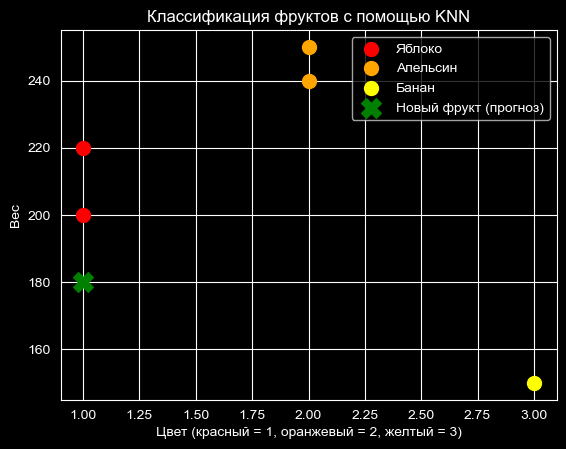

In [25]:
# Настройка графика
plt.title('Классификация фруктов с помощью KNN')
plt.xlabel('Цвет (красный = 1, оранжевый = 2, желтый = 3)')
plt.ylabel('Вес')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()